In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def muestra(img):
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.xticks([]),plt.yticks([]) #Ocultar ejes
    plt.show()

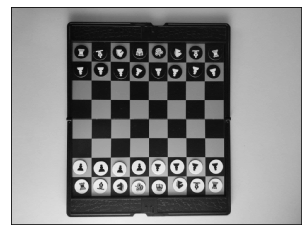

(960, 1280)

In [102]:
img = cv2.imread("./javih/imgs/tableros/04.jpg",0)
#gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(img,(5,5),cv2.BORDER_DEFAULT)
muestra(gray)
gray.shape

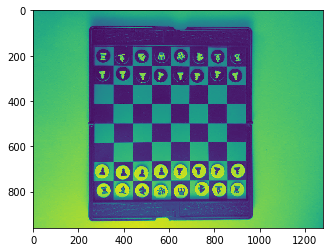

In [4]:
plt.imshow(img)


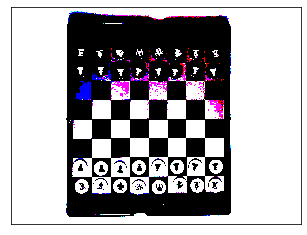

In [84]:
ret,thresh1 = cv2.threshold(img,128,255,cv2.THRESH_BINARY)
#FLOODFILL
mask = np
muestra(thresh1)

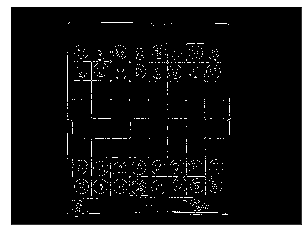

In [127]:
canny = cv2.Canny(flood, 128, 128)
muestra(canny)

In [129]:
    cdst = cv2.cvtColor(canny, cv2.COLOR_GRAY2BGR)
    cdstP = np.copy(cdst)

    lines = cv2.HoughLines(canny, 1, np.pi/180, 150, None, 0, 0)
    if lines is not None:
        for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            a = math.cos(theta)
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho
            pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
            pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
            cv2.line(cdst, pt1, pt2, (255,255,255), 3, cv2.LINE_AA)
            
    linesP = cv2.HoughLinesP(canny, 1, np.pi/50000, 500, None, 50, 10)
    
    if linesP is not None:
        for i in range(0, len(linesP)):
            l = linesP[i][0]
            cv2.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv2.LINE_AA)

In [8]:
print(lines[0])


[[355.   0.]]


In [128]:

cdst = cv2.cvtColor(cdst, cv2.COLOR_BGR2GRAY)
plt.imshow(cdst)
corners = cv2.goodFeaturesToTrack(cdst, 4,0.8,1000)
corners = np.int0(corners)
print(corners)
for i in corners:
    x,y = i.ravel()
    cv2.circle(img,(x,y),3,1,-1)

error: OpenCV(3.4.2) c:\projects\opencv-python\opencv\modules\imgproc\src\color.hpp:253: error: (-215:Assertion failed) VScn::contains(scn) && VDcn::contains(dcn) && VDepth::contains(depth) in function 'cv::CvtHelper<struct cv::Set<3,4,-1>,struct cv::Set<1,-1,-1>,struct cv::Set<0,2,5>,2>::CvtHelper'


In [10]:
mask = cv2.inRange(cdst, np.array([0,0,0]) , np.array([0,0,255]))
res = cv2.bitwise_and(cdst, cdst, mask = mask)

error: OpenCV(3.4.2) C:\projects\opencv-python\opencv\modules\core\src\arithm.cpp:1777: error: (-209:Sizes of input arguments do not match) The lower boundary is neither an array of the same size and same type as src, nor a scalar in function 'cv::inRange'


In [11]:
def line_intersection(line1, line2):
    xdiff = (line1[0] - line1[1], line2[0] - line2[1])
    ydiff = (line1[0] - line1[1], line2[0] - line2[1])

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)

    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    return x, y

In [12]:
persp = cv2.getPerspectiveTransform(puntos1, puntos2)
dst = cb2.warpPerspective(img, persp, tamanoFinalImagen)
plt.imshow(dst)

NameError: name 'puntos1' is not defined

In [13]:
    cdst = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    cdstP = np.copy(cdst)

    lines = cv2.HoughLines(img, 1, np.pi/180, 150, None, 0, 0)
    if lines is not None:
        for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            a = math.cos(theta)
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho
            pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
            pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
            cv2.line(cdst, pt1, pt2, (255,255,255), 3, cv2.LINE_AA)

In [14]:
print(len(lines))

10403


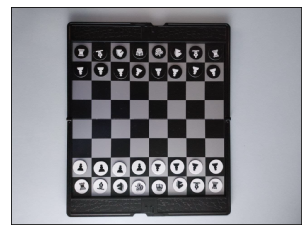

In [97]:
muestra(gray)

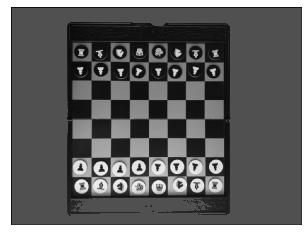

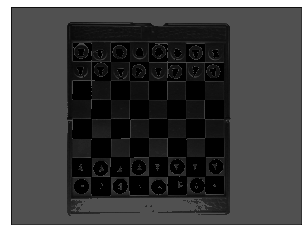

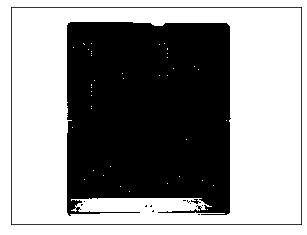

In [121]:
flood = gray.copy()
h, w = gray.shape[:2]
mask = np.zeros ([h + 2, w + 2], np.uint8) 
cv2.floodFill(flood, mask, (0, 0), 80, 100, 100, cv2.FLOODFILL_FIXED_RANGE)
muestra(flood)
ret,flooded = cv2.threshold(flood, 80, 255, cv2.THRESH_TOZERO_INV)
muestra(flooded)
ret,roi = cv2.threshold(flooded, 79, 255, cv2.THRESH_BINARY)
muestra(roi)

In [167]:
def get_roi(img):
    flood = gray.copy()
    h, w = gray.shape[:2]
    mask = np.zeros ([h + 2, w + 2], np.uint8) 
    cv2.floodFill(flood, mask, (0, 0), 80, 100, 100, cv2.FLOODFILL_FIXED_RANGE)
    #muestra(flood)
    ret,flooded = cv2.threshold(flood, 80, 255, cv2.THRESH_TOZERO_INV)
    #muestra(flooded)
    ret,roi = cv2.threshold(flooded, 79, 255, cv2.THRESH_BINARY)
    return roi

In [32]:
mask

array([[[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       ...,

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]]], dtype=uint8)

In [130]:
m = roi == 0

In [131]:
def get_height(roi):
    #devuelve en el primer valor el ancho mas grande del roi y en el segundo el valor de su i
    m = roi == 0
    res = 0
    resi = 0
    for j in range(roi.shape[1]):
        height = sum(map(lambda p: 1 if p else 0, m[:,j]))
        if height > res:
            res = height
            resi = primerT(m[:,j])
            
   
            
    return res, resi

In [20]:
def get_width(roi):
    #devuelve en el primer valor la altura mayor  del roi y en el segundo el valor de su j
    m = roi == 0
    res = 0
    for i in range(roi.shape[0]):
        width = sum(map(lambda p: 1 if p else 0, m[i,:]))
        if width > res:
            res = width
            resj = primerT(m[i,:])
            
   
            
    return res, resj

In [21]:
def primerT(linea):
    for i in range(linea.shape[0]):
        if linea[i] == True:
            return i

In [132]:
get_width(roi)

(723, 246)

In [133]:
get_height(roi)

(848, 72)

In [177]:
def get_tablero(img):
    roi = get_roi(img)
    lh, h = get_height(roi)
    lw, w = get_width(roi)
    tablero = img[h:h+lh, w:w+lw]
    bordeSup = int(0.1 * tablero.shape[0])
    bordeLat = int(0.04 * tablero.shape[1])        
    return tablero[bordeSup:img2.shape[0]-bordeSup, bordeLat:img2.shape[1]-bordeLat] # tablero sin bordes

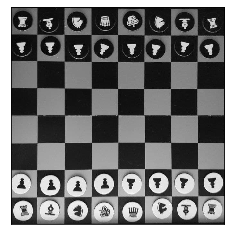

In [178]:
muestra(get_tablero(img))

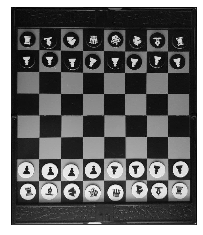

In [134]:
img2 = img[72:72+848, 246:246+723]
muestra(img2)

In [138]:
bordeSup

42

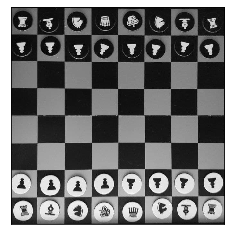

In [153]:
tablero = img2[bordeSup:img2.shape[0]-bordeSup, bordeLat:img2.shape[1]-bordeLat]
muestra(tablero)

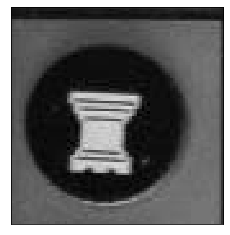

In [154]:
muestra(tablero[:int(tablero.shape[0]/8),:int(tablero.shape[1]/8)])

In [195]:
def casillas(tablero):
    tami = int(tablero.shape[0]/8)
    tamj = int(tablero.shape[1]/8) 
    
    res =[[None for _ in range(8)] for _ in range(8)]
    for i in range(8):
        for j in range(8):
            h,w = tablero.shape
            casilla = tablero[tami * i:tami * (i+1), tamj * j: tamj * (j+1)]
            res[i][j] = casilla
            #muestra(casilla)
    return res

In [196]:
cas = casillas(get_tablero(img))

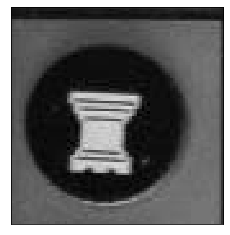

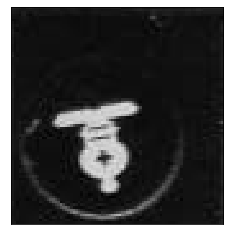

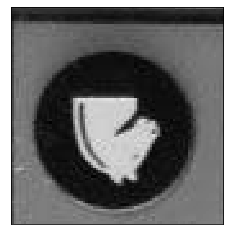

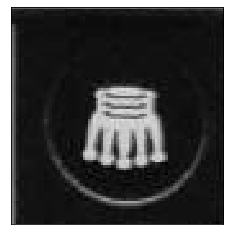

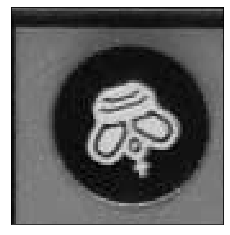

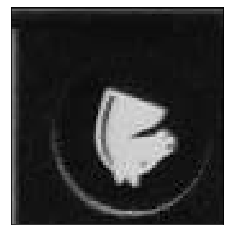

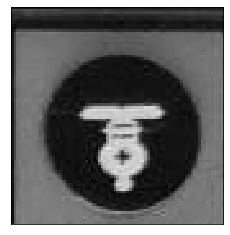

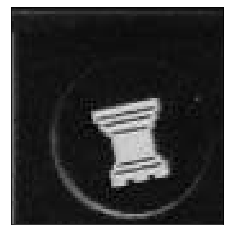

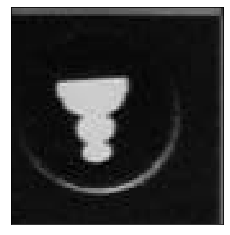

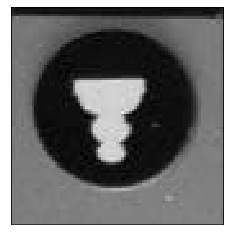

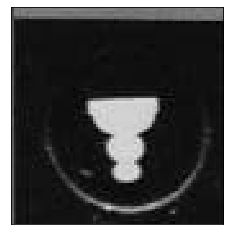

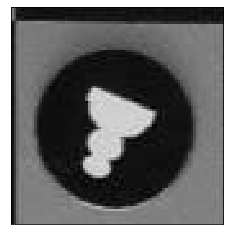

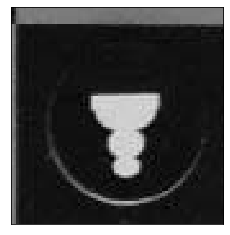

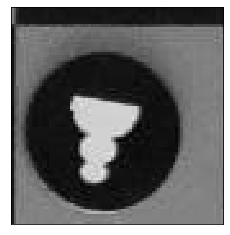

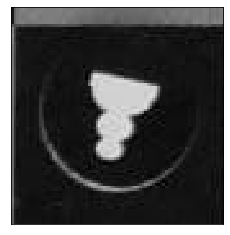

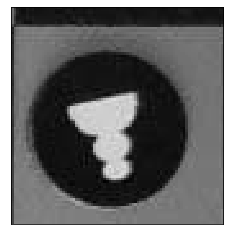

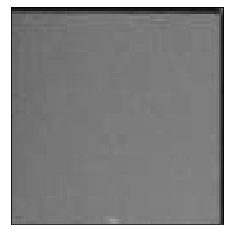

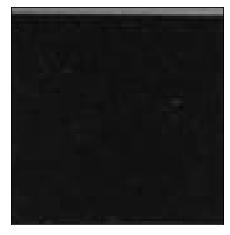

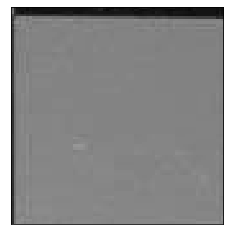

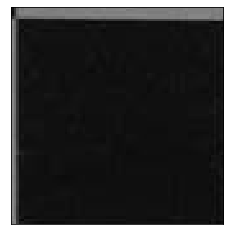

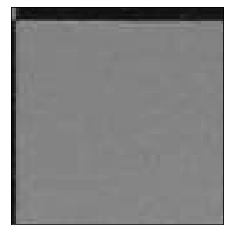

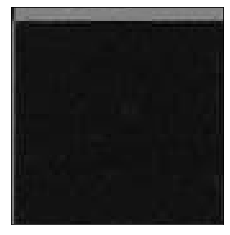

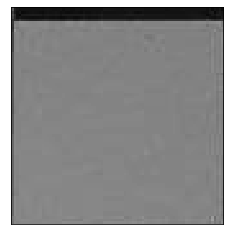

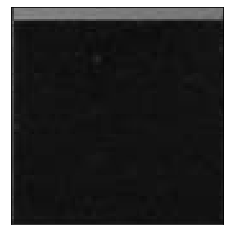

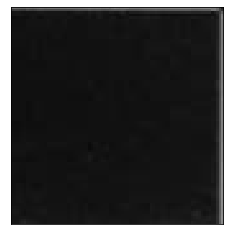

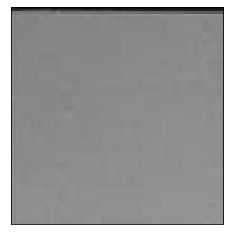

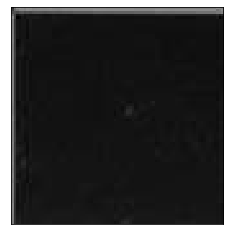

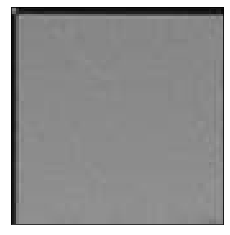

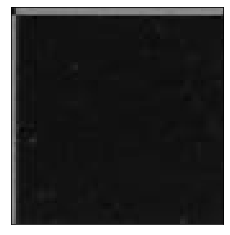

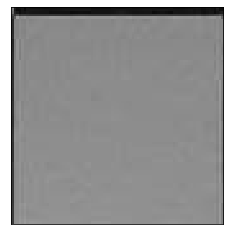

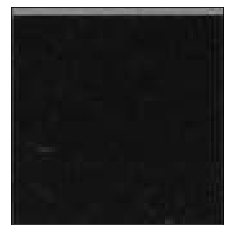

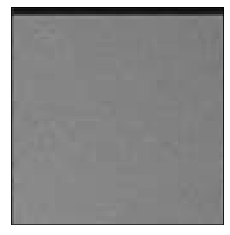

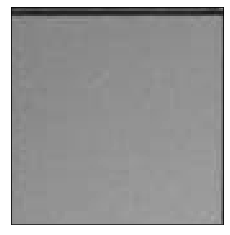

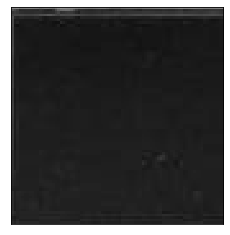

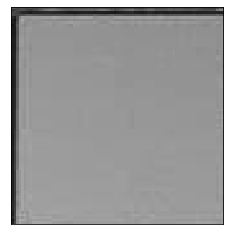

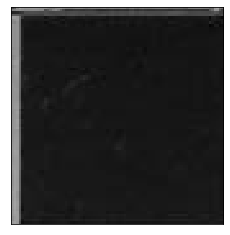

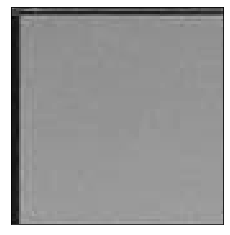

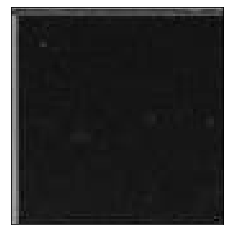

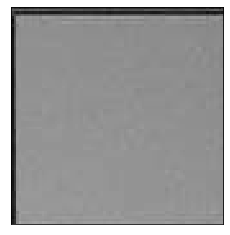

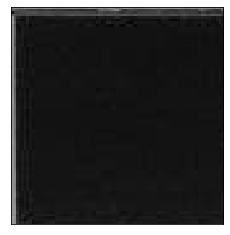

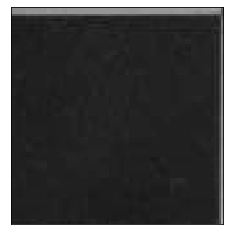

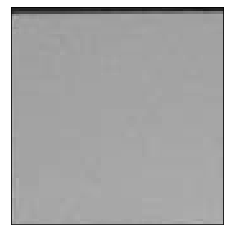

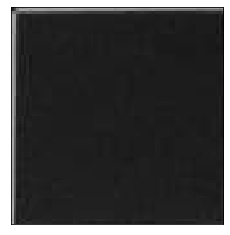

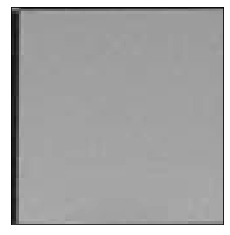

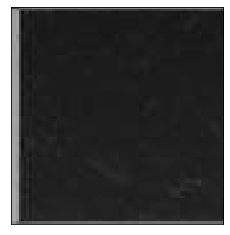

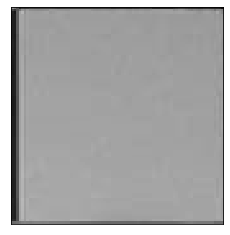

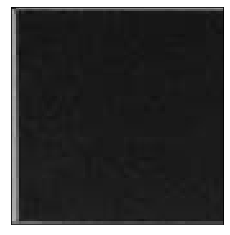

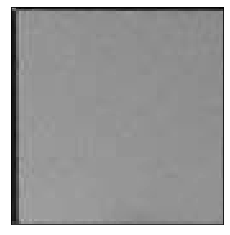

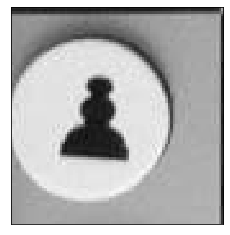

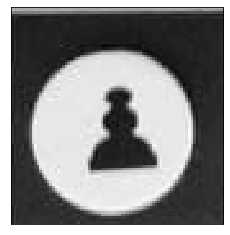

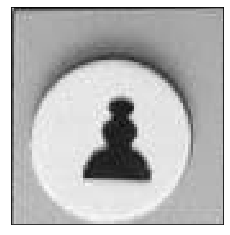

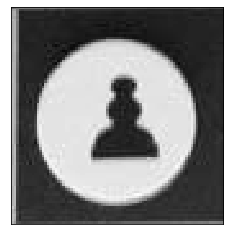

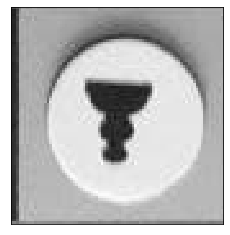

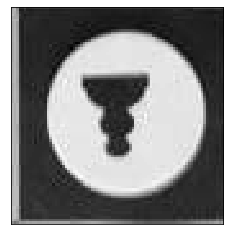

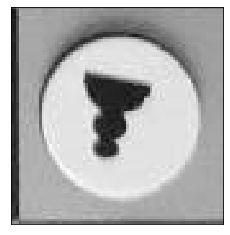

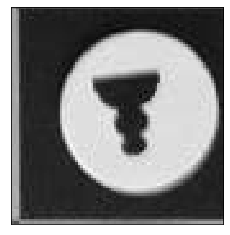

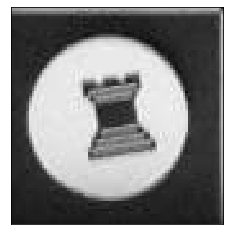

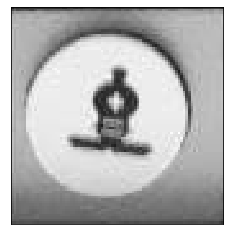

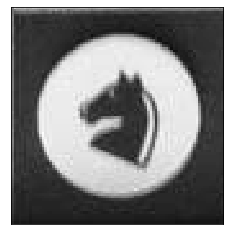

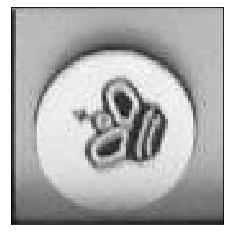

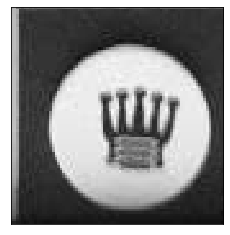

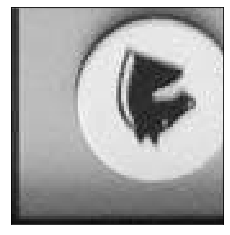

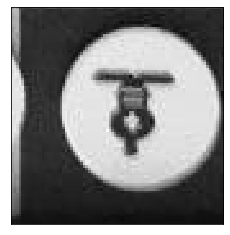

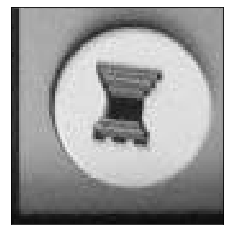

In [198]:
for i in range(8):
    for j in range(8):
        muestra(cas[i][j])